In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
train = pd.read_csv("../datas/titanic/train.csv")
test = pd.read_csv("../datas/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(train.Survived.skew())

0.4785234382949897


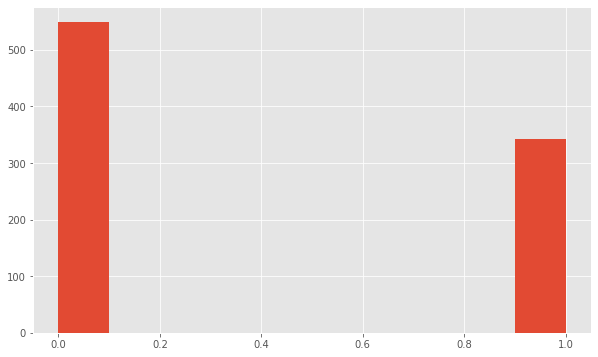

In [8]:
plt.hist(train.Survived)
plt.show()

In [9]:
numeric_features = train.select_dtypes(include=[np.number])
corelation = numeric_features.corr()
print(corelation['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [10]:
categorical = train.select_dtypes(exclude=[np.number])
categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


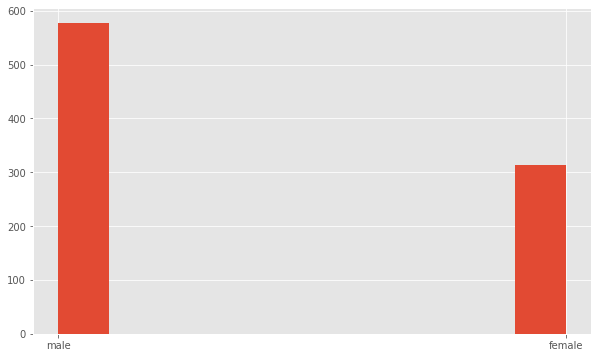

In [12]:
plt.hist(train.Sex)
plt.show()

In [13]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
def transformSex(x):
    if x=="male":
        return 1
    return 0
train["sex_numeric"] = train.Sex.apply(transformSex)
test["sex_numeric"] = test.Sex.apply(transformSex)

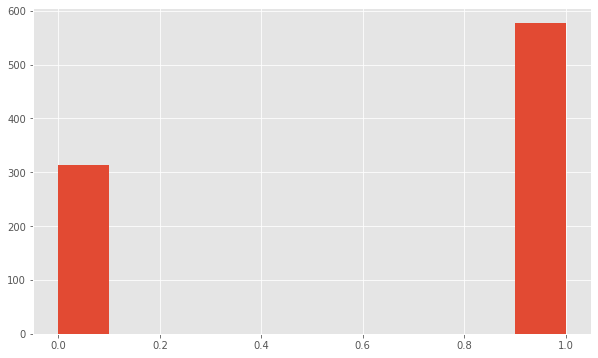

In [16]:
plt.hist(train.sex_numeric)
plt.show()

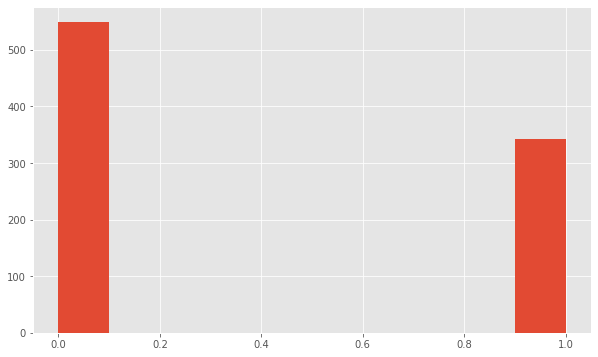

In [19]:
plt.hist(train.Survived)
plt.show()

In [22]:
train.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [23]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

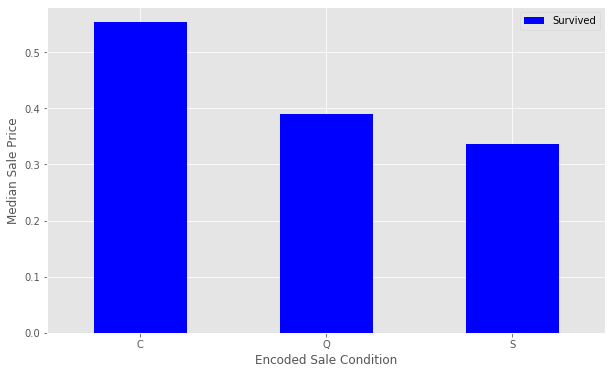

In [25]:
condition_pivot = train.pivot_table(index='Embarked', values='Survived')
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [26]:
def transformEmbarked(x):
    if(x=='C'):
        return 0
    elif(x=='Q'):
        return 1
    return 2

train["new_embarked"] = train.Embarked.apply(transformEmbarked)
test["new_embarked"] = test.Embarked.apply(transformEmbarked)

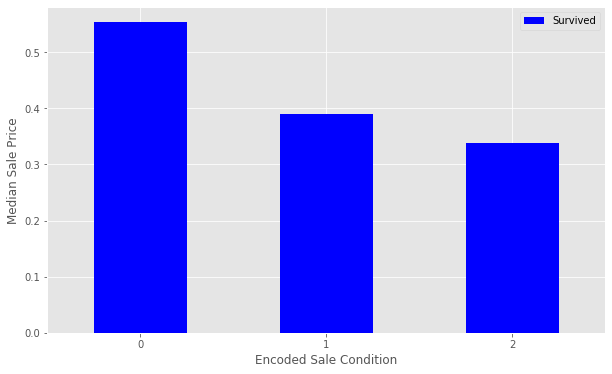

In [27]:
condition_pivot = train.pivot_table(index='new_embarked', values='Survived')
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [29]:
print(train.select_dtypes(include=[np.number]))

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  sex_numeric  \
0              1         0       3  22.0      1      0   7.2500            1   
1              2         1       1  38.0      1      0  71.2833            0   
2              3         1       3  26.0      0      0   7.9250            0   
3              4         1       1  35.0      1      0  53.1000            0   
4              5         0       3  35.0      0      0   8.0500            1   
..           ...       ...     ...   ...    ...    ...      ...          ...   
886          887         0       2  27.0      0      0  13.0000            1   
887          888         1       1  19.0      0      0  30.0000            0   
888          889         0       3   NaN      1      2  23.4500            0   
889          890         1       1  26.0      0      0  30.0000            1   
890          891         0       3  32.0      0      0   7.7500            1   

     new_embarked  
0               2  

In [32]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [33]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
sex_numeric     0
new_embarked    0
dtype: int64

In [34]:
Y = data.Survived
X = data.drop(['Survived', 'PassengerId'], axis=1)

In [35]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
model = lr.fit(X, Y)

In [37]:
submission = pd.DataFrame()
submission['PassengerId'] = test.PassengerId
features = test.select_dtypes(include=[np.number]).drop(['PassengerId'], axis=1).interpolate()
predictions = model.predict(features)

In [38]:
submission['Survived'] = predictions

In [39]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [40]:
submission.to_csv('submission_titanic.csv', index=False)